In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
label = pd.read_csv('./dataset/label.csv')
label.head()

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,meningioma_tumor
3,IMAGE_0003.jpg,glioma_tumor
4,IMAGE_0004.jpg,meningioma_tumor


In [3]:
ImageData = []
for i in tqdm(range(label.shape[0])):  
    org_img = Image.open('./dataset/image/' + label['file_name'][i]).convert('L') #Image(512, 512), gray-scale
    img = np.array(org_img) # numpy(512, 512)
    ImageData.append(img)

100%|██████████| 3000/3000 [00:12<00:00, 248.79it/s]


In [4]:
X = np.array(ImageData)
X = X.reshape((X.shape[0], -1))
print("X.shape is", X.shape)

Y = np.array(label['label'])
Y[Y != 'no_tumor'] = 'tumor' #no_tumor记为0, 有tumor记为tumor
print("Y.shape is", Y.shape)

X.shape is (3000, 262144)
Y.shape is (3000,)


In [5]:
# Do the Normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scaler = min_max_scaler.fit_transform(X) # Normalize to [0,1]

In [6]:
# Do the PCA dimension reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=3000) # Reduce to 3000 features, since n_components == min(n_samples, n_features)
X_pca = pca.fit_transform(X_scaler)
print(pca.explained_variance_ratio_)

[2.06554619e-01 6.72555435e-02 3.44269579e-02 ... 3.07520491e-35
 2.26524640e-35 3.90437596e-36]


In [7]:
X_pca.shape

(3000, 3000)

In [6]:
# train_images = X_pca[:2400][:]
# valid_images = X_pca[2400:2700][:]
# test_images = X_pca[2700:][:]

# Divide the Datast into training set, validation set and test set.

train_images = X_scaler[:2400][:]
valid_images = X_scaler[2400:2700][:]
test_images = X_scaler[2700:][:]

train_labels = Y[:2400]
valid_labels = Y[2400:2700]
test_labels = Y[2700:]

In [9]:
# Draw related figures 

import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

def draw_pics(model, predicted_probas):
    #RO Curve
    skplt.metrics.plot_roc(test_labels, predicted_probas)
    plt.savefig('pictures/' +  str(model) + '_roc.jpg')
    #P-R曲线
    skplt.metrics.plot_precision_recall(test_labels, predicted_probas, cmap='nipy_spectral')
    plt.savefig('pictures/' +  str(model) + '_P-R.jpg')
    #混淆矩阵
    predictions = cross_val_predict(model, train_images, train_labels)
    plot = skplt.metrics.plot_confusion_matrix(train_labels, predictions, normalize=True)
    plt.savefig('pictures/' +  str(model) + '_confusionMatrix.jpg')
    #学习曲线图
    skplt.estimators.plot_learning_curve(model, train_images, train_labels)
    plt.savefig('pictures/' +  str(model) + '_learning_curve.jpg')

In [7]:
from sklearn.linear_model import LogisticRegression

# Build Logistic Regression Model
logreg = LogisticRegression(solver='lbfgs')
# Train the model using the training sets
logreg.fit(train_images, train_labels)
y_pred_LR = logreg.predict(test_images)

print('Accuracy on test set: '+ str(accuracy_score(test_labels, y_pred_LR)))
print(classification_report(test_labels, y_pred_LR)) #text report showing the main classification metrics

/home/uceehx2/AMLS/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on test set: 0.94
              precision    recall  f1-score   support

    no_tumor       0.94      0.67      0.78        48
       tumor       0.94      0.99      0.97       252

    accuracy                           0.94       300
   macro avg       0.94      0.83      0.87       300
weighted avg       0.94      0.94      0.94       300



/home/uceehx2/AMLS/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/uceehx2/AMLS/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

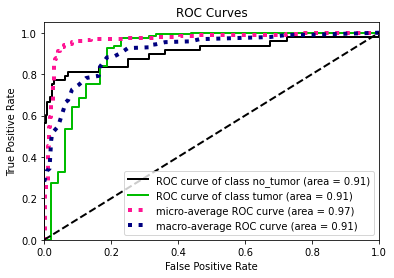

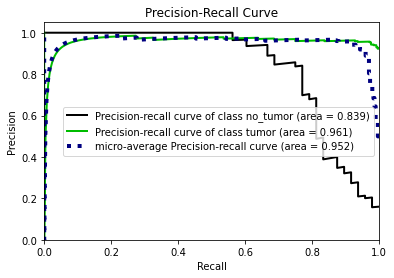

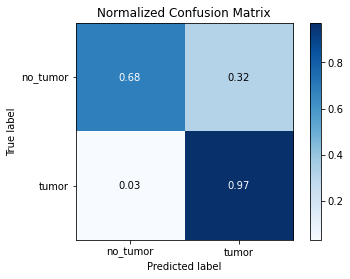

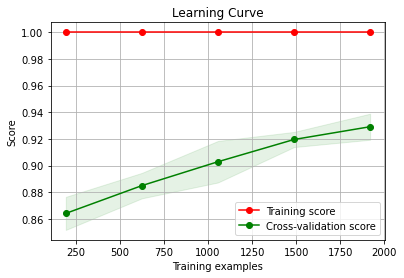

In [11]:
y_pred_proba_LR = logreg.predict_proba(test_images)
draw_pics(logreg, y_pred_proba_LR)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest Model
RandomForest = RandomForestClassifier(n_estimators=150)
# Train the model using the training sets
RandomForest = RandomForest.fit(train_images, train_labels)

y_pred_RF = RandomForest.predict(test_images)
# y_pred_proba_RF = RandomForest.predict_proba(test_images)
print('Accuracy on test set: '+ str(accuracy_score(test_labels, y_pred_RF)))
print(classification_report(test_labels, y_pred_RF)) #text report showing the main classification metrics

Accuracy on test set: 0.9633333333333334
              precision    recall  f1-score   support

    no_tumor       0.91      0.85      0.88        48
       tumor       0.97      0.98      0.98       252

    accuracy                           0.96       300
   macro avg       0.94      0.92      0.93       300
weighted avg       0.96      0.96      0.96       300



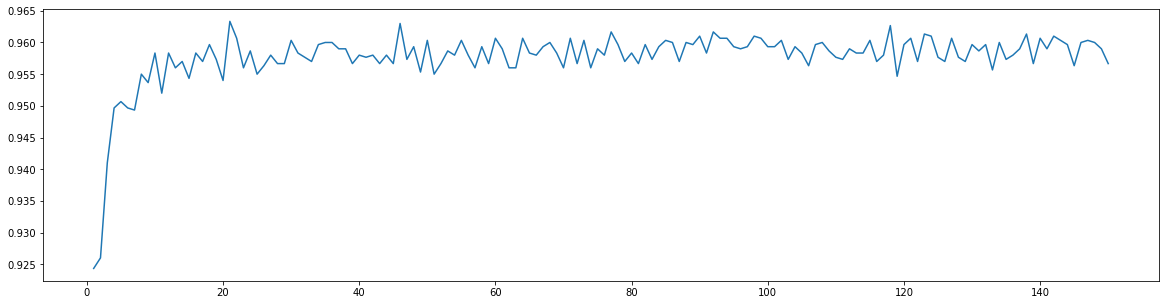

In [11]:
from sklearn.model_selection import cross_val_score

# For RF classifier, using cross_validation to evaluate

superpa = []
for i in range(150):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, X_scaler, Y, cv=10).mean()
    superpa.append(rfc_s)
plt.figure(figsize=[20,5])
plt.plot(range(1,151),superpa)
plt.show()

In [15]:
from sklearn import svm
from sklearn.svm import SVC

# Build SVM model
SVM_rbf = svm.SVC(C=1, kernel='rbf', gamma='auto', probability=True)
# Train the model using the training sets
SVM_rbf.fit(train_images, train_labels)

y_pred_SVM = SVM_rbf.predict(test_images)
y_pred_proba_SVM = SVM_rbf.predict_proba(test_images)

print('Accuracy on test set: '+ str(accuracy_score(test_labels, y_pred_SVM)))
print(classification_report(test_labels, y_pred_SVM)) #text report showing the main classification metrics

In [14]:
draw_pics(SVM_rbf, y_pred_proba_SVM)